In [ ]:
# ベイズ推論による機械学習　2章　基本的な確率分布 #

In [2]:
using Random, Distributions, PyPlot
Random.seed!(123);

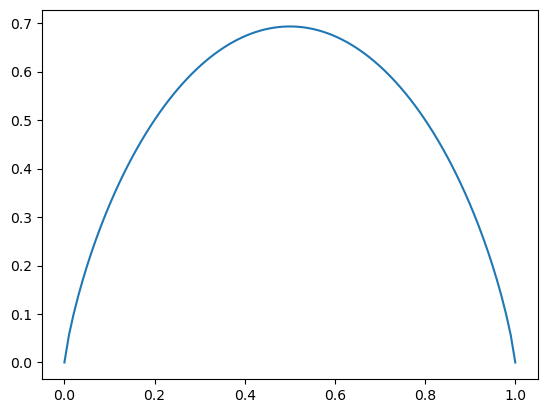

In [20]:
# Entropy of Bernoulli distribution
N = 100
H = zeros(N)
for (i, μ) in enumerate(range(0, 1, length=N))
    H[i] = entropy(Bernoulli(μ))
end

plot(range(0, 1, length=N), H);

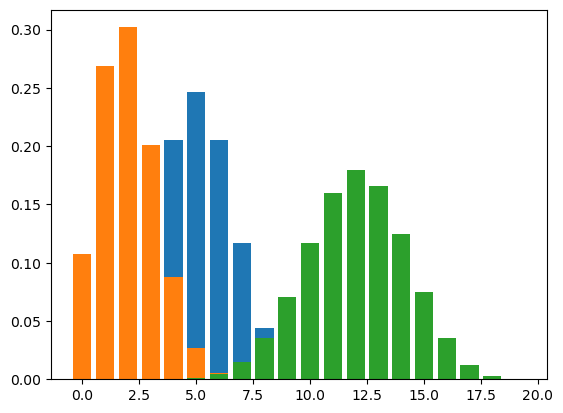

In [24]:
# Binomial distribution
x = range(0, step=1, length=20)

p1 = pdf(Binomial(10, 0.5), x)
p2 = pdf(Binomial(10, 0.2), x)
p3 = pdf(Binomial(20, 0.6), x)

bar(x, p1); bar(x, p2); bar(x, p3);

In [25]:
Binomial(10, 0.5)

Binomial{Float64}(n=10, p=0.5)

In [29]:
Categorical([0.3,0.2,0.5])

DiscreteNonParametric{Int64,Float64,Base.OneTo{Int64},Array{Float64,1}}(support=Base.OneTo(3), p=[0.3, 0.2, 0.5])

In [33]:
Multinomial(5, [0.15,0.7,0.15])

Multinomial{Float64,Array{Float64,1}}(n=5, p=[0.15, 0.7, 0.15])

In [30]:
Poisson(0.5)

Poisson{Float64}(λ=0.5)

In [31]:
Beta(0.5, 0.5)

Beta{Float64}(α=0.5, β=0.5)

In [32]:
Dirichlet([0.5,0.5,0.5])

Dirichlet{Float64,Array{Float64,1},Float64}(alpha=[0.5, 0.5, 0.5])

In [34]:
Gamma(2.0, 2.0)

Gamma{Float64}(α=2.0, θ=2.0)

In [35]:
Normal(0.0, 1.0)

Normal{Float64}(μ=0.0, σ=1.0)

In [40]:
MvNormal(ones(3), Diagonal(ones(3)))

DiagNormal(
dim: 3
μ: [1.0, 1.0, 1.0]
Σ: [1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0]
)


In [45]:
ν= 5.0
W =  Matrix{Float64}(2.0I, 2, 2)
Wishart(ν, W)

Wishart{Float64,PDMats.PDMat{Float64,Array{Float64,2}},Int64}(
df: 5.0
S: [2.0 0.0; 0.0 2.0]
)
